## Multivariable Regression Model of FBI Property Crime Statistics



Using the FBI:UCR Crime dataset, which can be found [here](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls),   build a regression model to predict property crimes. 

The FBI defines property crime as including the offenses of burglary, larceny-theft, motor vehicle theft, and arson. To predict property crime, one can simply use these features. 

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model


# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore"
)

In [2]:
data_path = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
data = pd.read_csv(data_path, delimiter = ',', skiprows=4, header=0, skipfooter=3, thousands=',')
data = pd.DataFrame(data)

In [3]:
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Property\ncrime'].values.reshape(-1, 1)
X = data[["Larceny-\ntheft", "Motor\nvehicle\ntheft", "Burglary"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.  1.  1.]]

Intercept: 
 [ -2.27373675e-13]

R-squared:
1.0


## Perfect accuracy, as expected. However......

Predicting ALL property crimes is a more interesting question. 

## Building a Model to Predict Property Crimes (without using the Property Crime features)

To start, let's take a look at how each of the non-property crime features interact with property crime. 



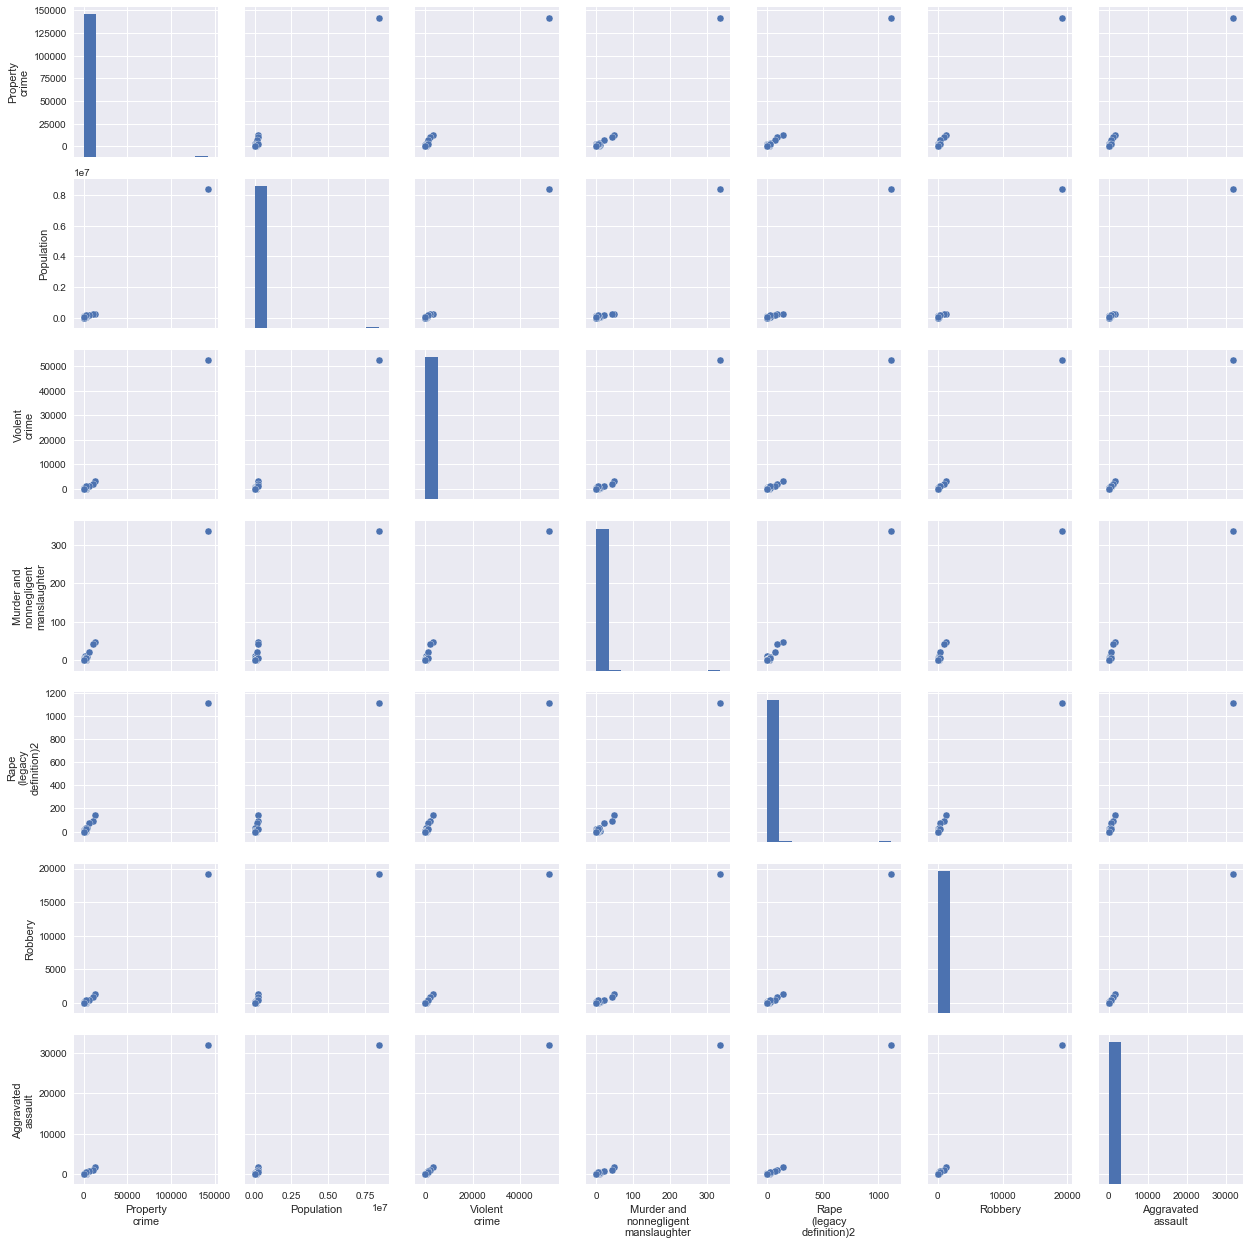

In [5]:
plt.figure(figsize=(15,5))
sns.pairplot(data, vars =['Property\ncrime', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']) 
plt.show()

That single outlier is making the relationships difficult to view. Let's remove the outlier. 

In [6]:
dataCleaned = data[data["Property\ncrime"] < 20000]

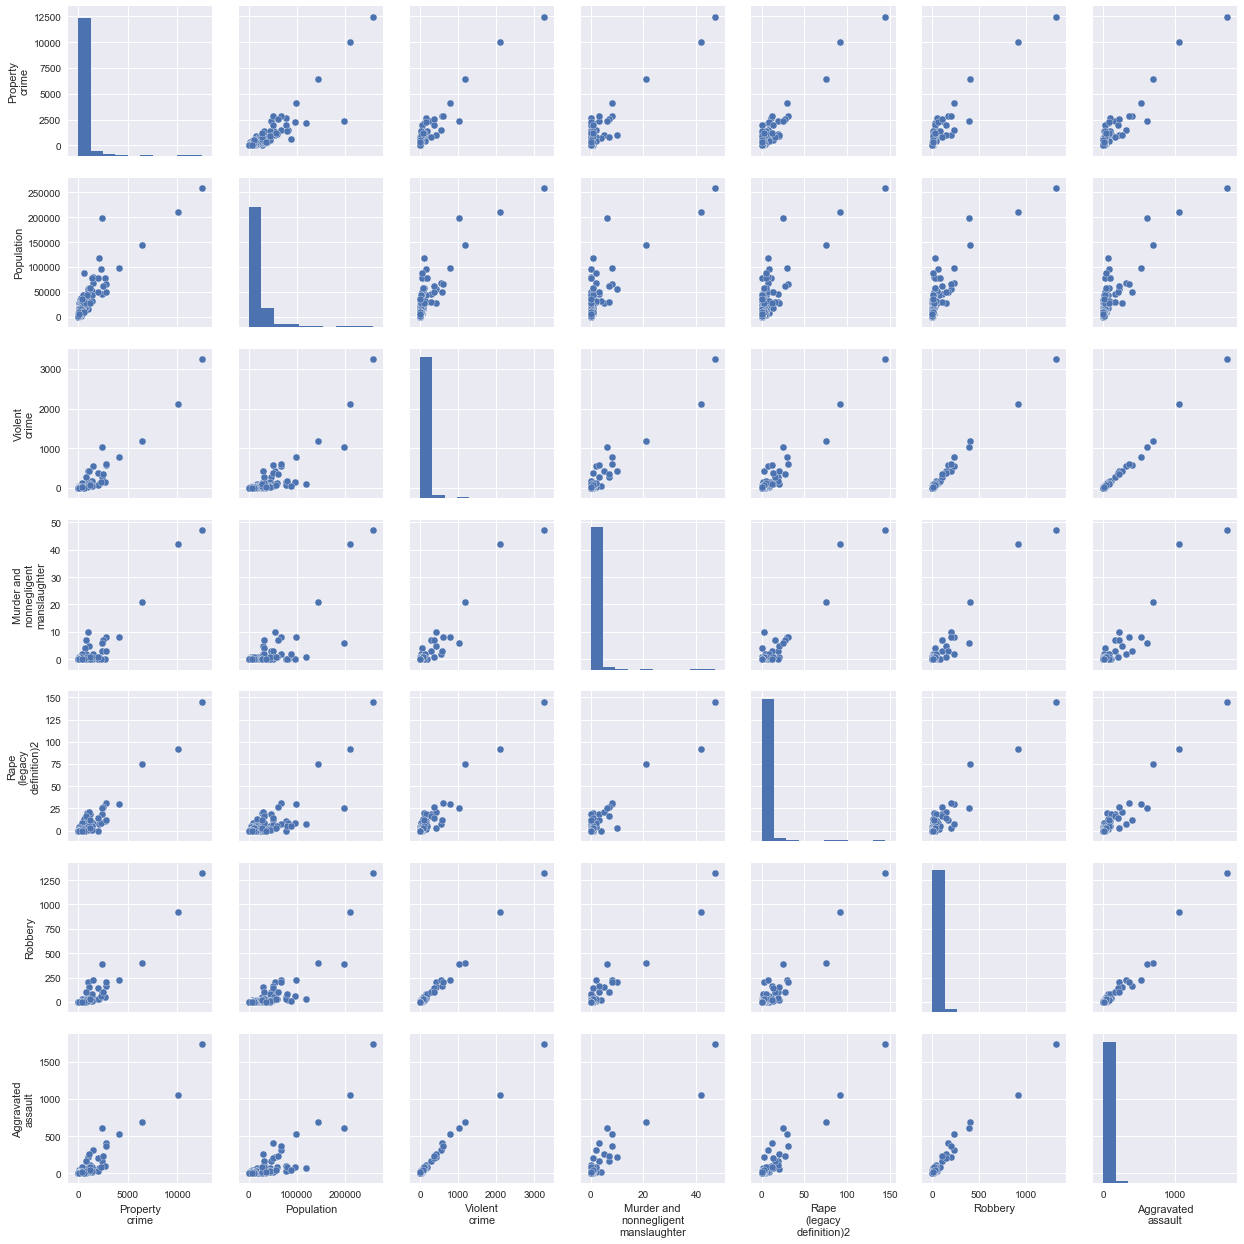

In [7]:
plt.figure(figsize=(15,5))
sns.pairplot(dataCleaned, vars =['Property\ncrime', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']) 
plt.show()

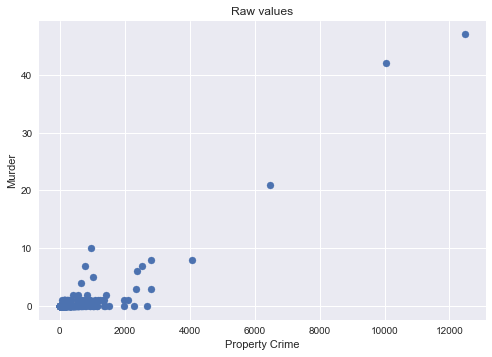

In [8]:
plt.scatter(dataCleaned["Property\ncrime"], dataCleaned["Murder and\nnonnegligent\nmanslaughter"])
plt.title('Raw values')
plt.xlabel("Property Crime")
plt.ylabel("Murder")
plt.show()

There is a large number of 0's for Murder. Perhaps let's use a binary value for murder occurring vs no murder occurring. 

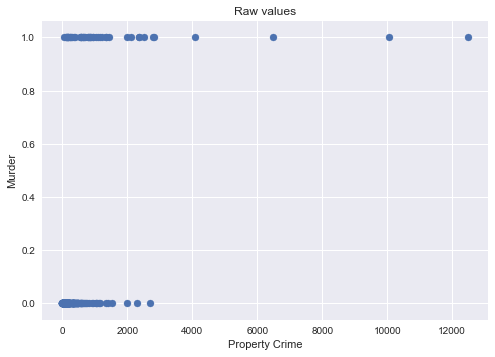

In [9]:
dataCleaned["Murder"] = dataCleaned['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 0 if x == 0 else 1)

plt.scatter(dataCleaned["Property\ncrime"], dataCleaned["Murder"])
plt.title('Raw values')
plt.xlabel("Property Crime")
plt.ylabel("Murder")
plt.show()

In [10]:
dataCleaned.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Murder
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,1
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN,0


In [11]:
regr = linear_model.LinearRegression()
Y = dataCleaned['Property\ncrime'].values.reshape(-1, 1)
X = dataCleaned[['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.35211120e-02   2.03018615e+01   3.63790825e+01   2.47232760e+01
   -2.12521814e+01  -1.95483156e+01]]

Intercept: 
 [ 9.48025988]

R-squared:
0.950982619239


## Noice!! 
What about performance when the binary Murder feature is used? 

In [12]:
regr = linear_model.LinearRegression()
Y = dataCleaned['Property\ncrime'].values.reshape(-1, 1)
X = dataCleaned[['Population', 'Violent\ncrime',
       'Murder', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.39419257e-02   6.37574382e+01  -5.85043045e+01  -1.97448163e+01
   -6.52374519e+01  -6.27376441e+01]]

Intercept: 
 [ 10.74635836]

R-squared:
0.951222943644


There is a slight increase of performance when the binary indicator for murder is used.  

## Leave no man behind! 
Reintroduce the outlier to the model. 

In [13]:
data["Murder"] = data['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 0 if x == 0 else 1)


regr = linear_model.LinearRegression()
Y = data['Property\ncrime'].values.reshape(-1, 1)
X = data[['Population', 'Violent\ncrime',
       'Murder', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



Coefficients: 
 [[  1.19440110e-02   7.04373894e+01   3.10866677e+01  -9.17864985e+00
   -7.07330299e+01  -7.18343944e+01]]

Intercept: 
 [ 31.38463798]

R-squared:
0.999003849335


Hmmmm....it seems that outlier result has also heavily weighted the R-squared result and coefficients. The linear model which did not incorporate the outlier is likely to be a better indicator of overall trends and accuracy. 

## Best Model:


In [14]:
regr = linear_model.LinearRegression()
Y = dataCleaned['Property\ncrime'].values.reshape(-1, 1)
X = dataCleaned[['Population', 'Violent\ncrime',
       'Murder', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.39419257e-02   6.37574382e+01  -5.85043045e+01  -1.97448163e+01
   -6.52374519e+01  -6.27376441e+01]]

Intercept: 
 [ 10.74635836]

R-squared:
0.951222943644


## Validating regression models for prediction

Now let's use cross-validation to obtain a more accurate description of our accuracy: 


In [15]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()

y = data['Property\ncrime'].values.reshape(-1, 1)
X = data[['Population', 'Violent\ncrime',
       'Murder', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']]

scores = cross_val_score(regr, X, y, cv = 10)

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

Percent accuracy within each fold:

[ 0.85113397  0.97672918  0.39041084  0.76138868  0.7549484   0.72489609
  0.96157164  0.9595789   0.97762802  0.85256133]

Mean accuracy:

0.821084705201


## Test the Model with Data From Another State

Now let's test our model with the 2013 Crime Rate dataset for California. Will the predictive power be similar? 

In [24]:
data_path = "files/table_8_offenses_known_to_law_enforcement_california_by_city_2013.csv"
dataCA = pd.read_csv(data_path, delimiter = ',', skiprows=4, header=0, skipfooter=3, thousands=',')
dataCA = pd.DataFrame(dataCA)


In [25]:
dataCA.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Unnamed: 13
0,Adelanto,31165,198,2,NaN,15,52,129,886,381,372,133,17,NaN
1,Agoura Hills,20762,19,0,NaN,2,10,7,306,109,185,12,7,NaN
2,Alameda,76206,158,0,NaN,10,85,63,1902,287,1285,330,17,NaN
3,Albany,19104,29,0,NaN,1,24,4,557,94,388,75,7,NaN
4,Alhambra,84710,163,1,NaN,9,81,72,1774,344,1196,234,7,NaN


In [26]:
dataCA["Murder"] = dataCA['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x: 0 if x == 0 else 1)

In [27]:
y = dataCA['Property\ncrime'].values.reshape(-1, 1)
X = dataCA[['Population', 'Violent\ncrime',
       'Murder', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault']]

scores = cross_val_score(regr, X, y, cv = 10)

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

Percent accuracy within each fold:

[ 0.88256872  0.83813945  0.63594188  0.82741147  0.94607165  0.89356858
  0.59922784  0.90741413  0.86736273  0.76805549]

Mean accuracy:

0.816576193827


## Results

The FBI dataset for California had similar predictive power to the New York dataset on which the Multivariable Regression Model was built. Within each cross-validation fold, there is a fair amount of variability for both California and New York. 